In [87]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

**This is the whole dataFrame including new and old education system**

In [2]:
thanawya = pd.read_excel("Thanawya.xlsx")

In [3]:
thanawya.head()

,seating_no,arabic_name,total_degree
0,1001660,محمد ابو الحسن حسن مصطفى,163.5
1,1001661,محمد احمد محمد ابو زيد,187.5
2,1001662,محمد على محمود عبدالعزيز,168.0
3,1001663,محمود سيد انور محمد حامد,212.0
4,1001664,محمود عطيه محمود جابر حجاج,154.0


**seperating new education system from old ecucation system**

In [ ]:
newThanawya  = thanawya[(thanawya['total_degree'] <= 319) & (thanawya['total_degree'] > 0)]

In [88]:
Average_grades = newThanawya['total_degree'].mean()
Average_degree = newThanawya['degree_percent'].mean()

**Total absences from old and new education systems**

In [89]:
absences = thanawya[thanawya['total_degree'] == 0]
absences_num = absences['total_degree'].count()
absences_num

27665

In [90]:
newThanawya.head()

,seating_no,arabic_name,total_degree,degree_percent,over_all
0,1001660,محمد ابو الحسن حسن مصطفى,163.5,51.09375,Very Weak
1,1001661,محمد احمد محمد ابو زيد,187.5,58.59375,Very Weak
2,1001662,محمد على محمود عبدالعزيز,168.0,52.50000,Very Weak
3,1001663,محمود سيد انور محمد حامد,212.0,66.25000,Weak
4,1001664,محمود عطيه محمود جابر حجاج,154.0,48.12500,Failed


**adding new columns of the percentage**

In [91]:
newThanawya['degree_percent'] = (newThanawya['total_degree']/320) * 100

**Categories of the grades** 

In [92]:
labels = ["Failed","Very Weak","Weak","Good","Very Good", "Excellent"]
bins = [0, 50, 60, 70, 80, 90, 100]
newThanawya['over_all'] = pd.cut(newThanawya['degree_percent'], labels= labels, bins= bins)

In [93]:
q1 = newThanawya['total_degree'].quantile(0.25)
q3 = newThanawya['total_degree'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
lower_bound
newThanawya = newThanawya[(newThanawya['total_degree'] < upper_bound) & (newThanawya['total_degree'] > lower_bound)]

**Visualization and graphs** 

In [94]:
sns.set_style("darkgrid")
sns.set_theme("notebook")

**count of the evaluation**

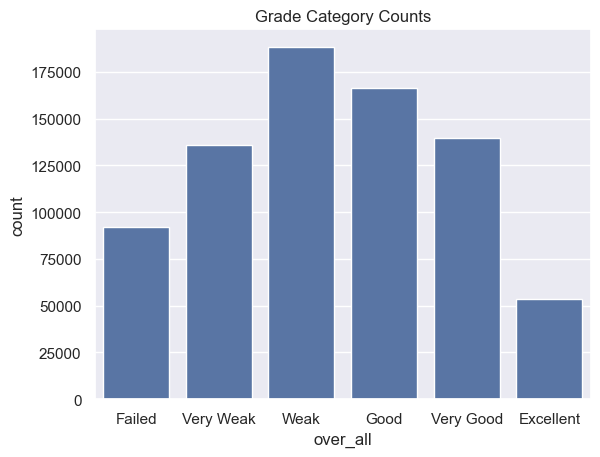

In [95]:
sns.countplot(data= newThanawya, x= 'over_all')
plt.title("Grade Category Counts")
plt.show()

**Distribution of the degrees**

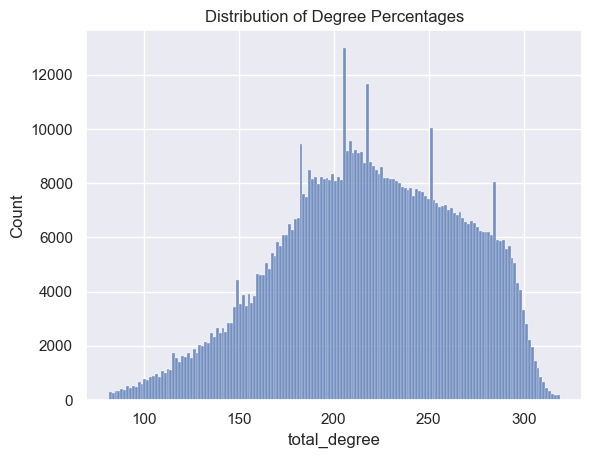

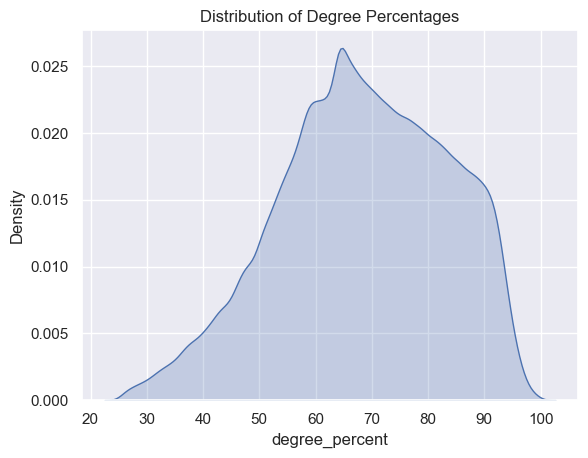

In [96]:
sns.histplot(data= newThanawya, x= 'total_degree')
plt.title("Distribution of Degree Percentages")
plt.show()
sns.kdeplot(newThanawya["degree_percent"], shade=True)
plt.title("Distribution of Degree Percentages")
plt.show()

**Analyzing Every Group Category**

In [97]:
cats = newThanawya.groupby('over_all')['total_degree'].agg(["count", "mean", "min", "max"])
cats

,count,mean,min,max
over_all,,,,
Failed,91771,135.644664,81.5,160.0
Very Weak,135842,178.002035,160.5,192.0
Weak,188277,208.418272,192.5,224.0
Good,166423,239.850592,224.5,256.0
Very Good,139627,271.686558,256.5,288.0
Excellent,53418,296.634271,288.5,319.0
